In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image

import tensorflow as tf

with tf.device('/gpu:1'):
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True
    tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))


# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

Using TensorFlow backend.


# Load Data

In [2]:
train_folder= './common/data/chest_xray/train/'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

Set up Training Folders

In [3]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

Set up Testing Folders

In [4]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

234
normal picture title:  NORMAL2-IM-0372-0001.jpeg
pneumonia picture title: person1669_virus_2884.jpeg


Text(0.5, 1.0, 'Pneumonia')

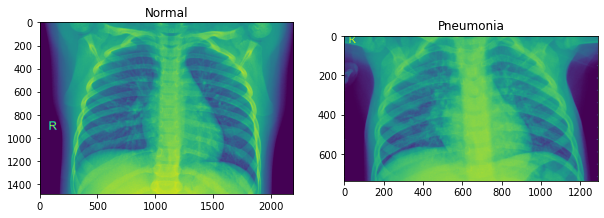

In [5]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

# plot images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

# Generate Dataset from image data

In [6]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/chest_xray/train/')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create/Load Model

In [7]:
from common.src import models

cnn = models.CNNModel(patience_s=49)
cnn.create_model()
cnn.summary()

# Fit Model

In [8]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs = 50)

Epoch 1/50
163/163 [==============================] - 57s 351ms/step - loss: 0.3487 - tp: 4421.0000 - fp: 789.0000 - tn: 4427.0000 - fn: 795.0000 - accuracy: 0.8482 - precision: 0.8486 - recall: 0.8476 - auc: 0.9256 - val_loss: 0.8221 - val_tp: 190.0000 - val_fp: 114.0000 - val_tn: 190.0000 - val_fn: 114.0000 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 0.6250 - val_auc: 0.8320
Epoch 2/50
163/163 [==============================] - 51s 311ms/step - loss: 0.2315 - tp: 4720.0000 - fp: 500.0000 - tn: 4716.0000 - fn: 496.0000 - accuracy: 0.9045 - precision: 0.9042 - recall: 0.9049 - auc: 0.9673 - val_loss: 0.8577 - val_tp: 190.0000 - val_fp: 114.0000 - val_tn: 190.0000 - val_fn: 114.0000 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 0.6250 - val_auc: 0.7715
Epoch 3/50
163/163 [==============================] - 50s 307ms/step - loss: 0.2075 - tp: 4779.0000 - fp: 434.0000 - tn: 4782.0000 - fn: 437.0000 - accuracy: 0.9165 - precision: 0.9167 - recall: 0.9162 - au

Epoch 22/50
163/163 [==============================] - 49s 303ms/step - loss: 0.1067 - tp: 5006.0000 - fp: 214.0000 - tn: 5002.0000 - fn: 210.0000 - accuracy: 0.9594 - precision: 0.9590 - recall: 0.9597 - auc: 0.9928 - val_loss: 0.6436 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8164
Epoch 23/50
163/163 [==============================] - 49s 298ms/step - loss: 0.1027 - tp: 5008.0000 - fp: 205.0000 - tn: 5011.0000 - fn: 208.0000 - accuracy: 0.9604 - precision: 0.9607 - recall: 0.9601 - auc: 0.9935 - val_loss: 0.7162 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.7852
Epoch 24/50
163/163 [==============================] - 49s 299ms/step - loss: 0.1001 - tp: 5014.0000 - fp: 194.0000 - tn: 5022.0000 - fn: 202.0000 - accuracy: 0.9620 - precision: 0.9627 - recall: 0.9613 - auc

Epoch 43/50
163/163 [==============================] - 49s 298ms/step - loss: 0.0752 - tp: 5067.0000 - fp: 144.0000 - tn: 5072.0000 - fn: 149.0000 - accuracy: 0.9719 - precision: 0.9724 - recall: 0.9714 - auc: 0.9963 - val_loss: 0.2802 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9570
Epoch 44/50
163/163 [==============================] - 49s 299ms/step - loss: 0.0667 - tp: 5097.0000 - fp: 119.0000 - tn: 5097.0000 - fn: 119.0000 - accuracy: 0.9772 - precision: 0.9772 - recall: 0.9772 - auc: 0.9968 - val_loss: 0.2379 - val_tp: 266.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 38.0000 - val_accuracy: 0.8438 - val_precision: 0.8235 - val_recall: 0.8750 - val_auc: 0.9590
Epoch 45/50
163/163 [==============================] - 49s 301ms/step - loss: 0.0734 - tp: 5077.0000 - fp: 142.0000 - tn: 5074.0000 - fn: 139.0000 - accuracy: 0.9731 - precision: 0.9728 - recall: 0.9734 - auc

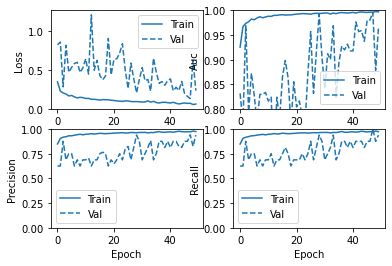

In [9]:
cnn.plot_history()

In [10]:
print(cnn.get_classification_report(test_set))

              precision    recall  f1-score   support

      NORMAL       0.96      0.77      0.85       234
   PNEUMONIA       0.88      0.98      0.92       390

    accuracy                           0.90       624
   macro avg       0.92      0.87      0.89       624
weighted avg       0.91      0.90      0.90       624

None


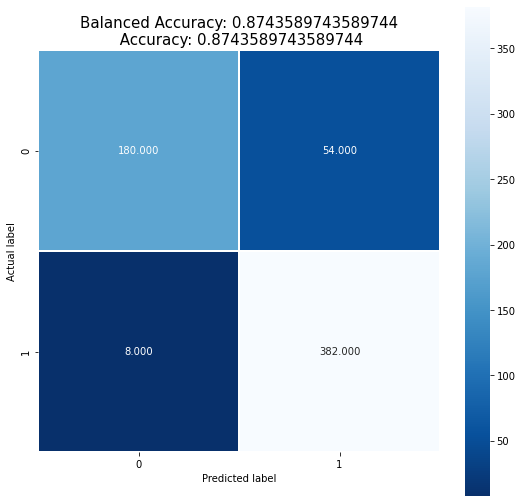

In [11]:
cnn.display_confusion_matrix(test_data_generator = test_set)